# 4.0-Level 1 annotation

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-04-14"

## Introduction

Level 1 annotation of main cell types in CD45 negative fraction

## Libraries

In [2]:
suppressMessages(suppressWarnings({
library(Seurat)
library(here)
library(glue)
library(ggplot2)
library(tidyverse)
library(dittoSeq)
}))

## Parameters

In [3]:
source(here("SCGRES_99_100/sc_analysis/misc/paths.R"))
source(here("utils/bin.R"))
source(here("utils/style.R"))

set.seed(0)

## Load data

In [4]:
seurat_obj <- readRDS(here(glue("{clust}/{robj_dir}/3.2-clustering_T0_CD45neg.rds")))

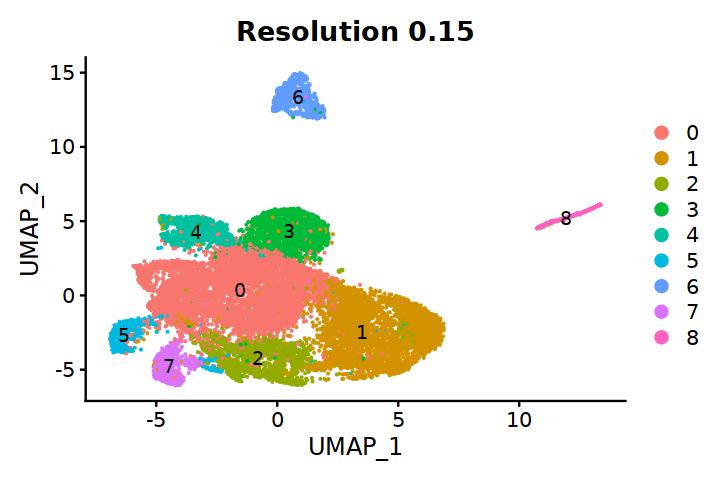

In [5]:
options(repr.plot.width = 6, repr.plot.height = 4, warn=-1,verbose = FALSE)
DimPlot(seurat_obj, reduction = "umap", label = T, label.size = 4) + 
  labs(title=glue("Resolution 0.15")) + theme(plot.title = element_text(hjust = 0.5))

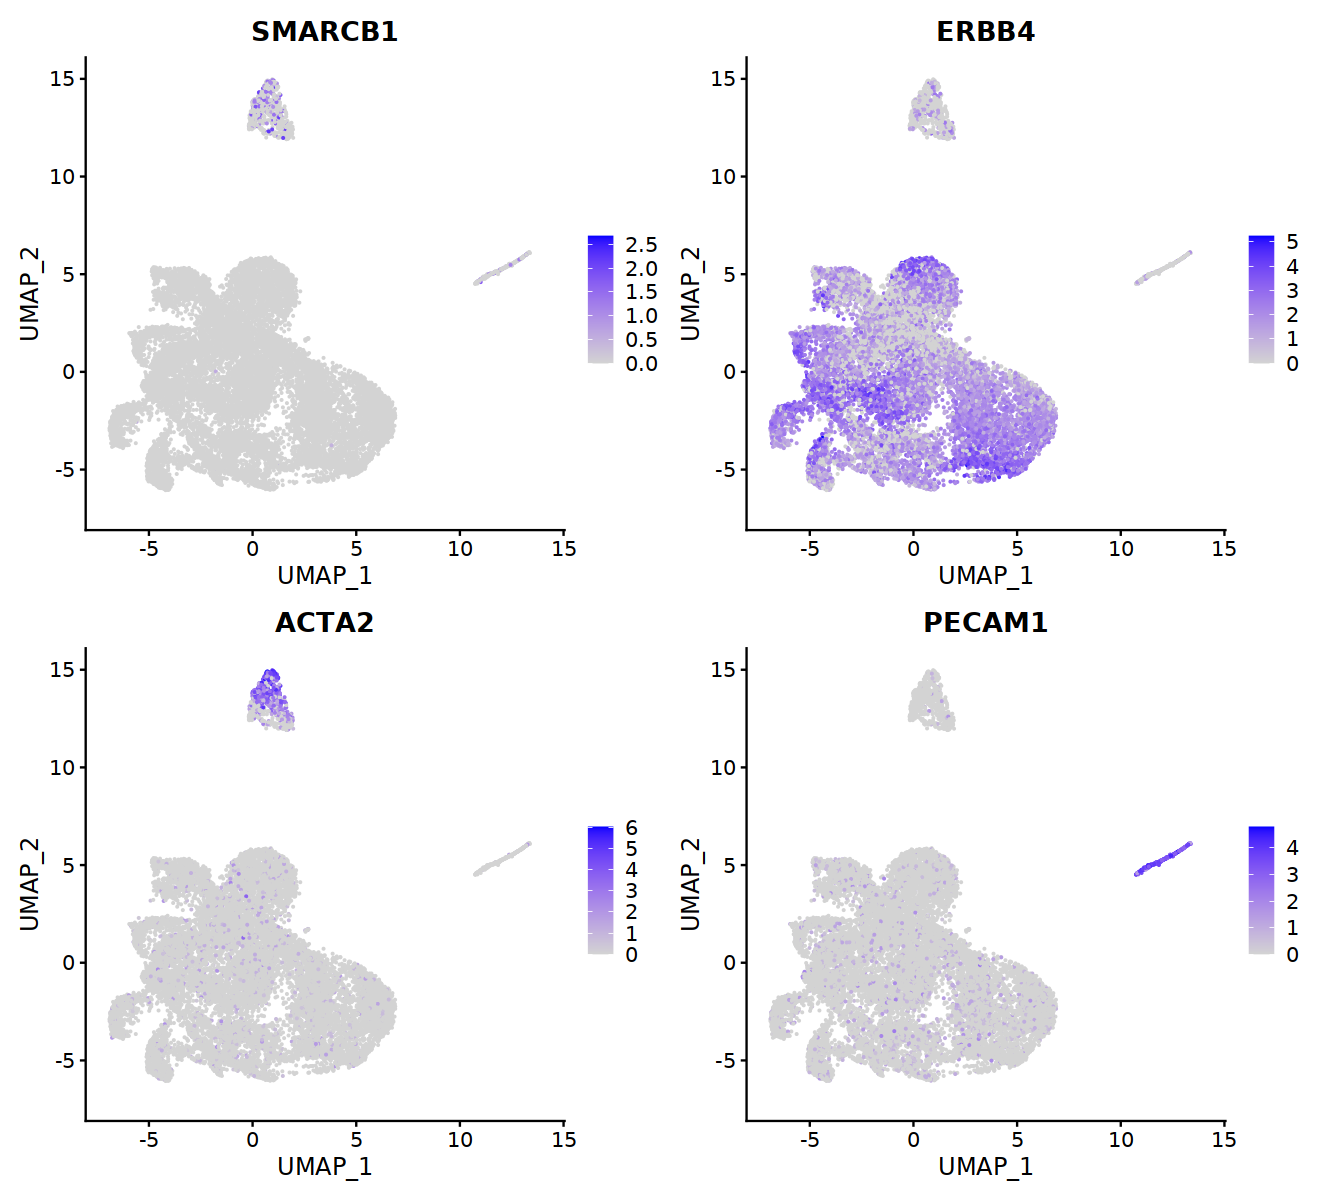

In [6]:
options(repr.plot.width = 11, repr.plot.height = 10, warn=-1,verbose = FALSE)
FeaturePlot(seurat_obj, reduction = "umap", feature=c("SMARCB1","ERBB4", 
                                                      "ACTA2", "PECAM1"), 
            order=F, ncol=2)

In [7]:
# Defined by top markers in 3.2
markers = list('0' = c("SEMA3D", "SOX4", "TNC"), 
               '1' = c("CDH18", "SLIT2", "EPHA5", "KRT19"),
               '2' = c("TOP2A", "MKI67"), 
               '3' = c("PTPRD", "SGCZ", "DGKB"),
               '4' = c("SEMA6D", "COL12A1", "MYOC"),
               '5' = c("TENM2", "COL25A1", "KCND2"),
               '7' = c("FBN2", "COL19A1", "FN1"),
               '6' = c("COL4A1", "ACTA2", "TAGLN"),
               '8' = c("PECAM1", "ANGPT2"))

In [8]:
levels(seurat_obj) <- names(markers)

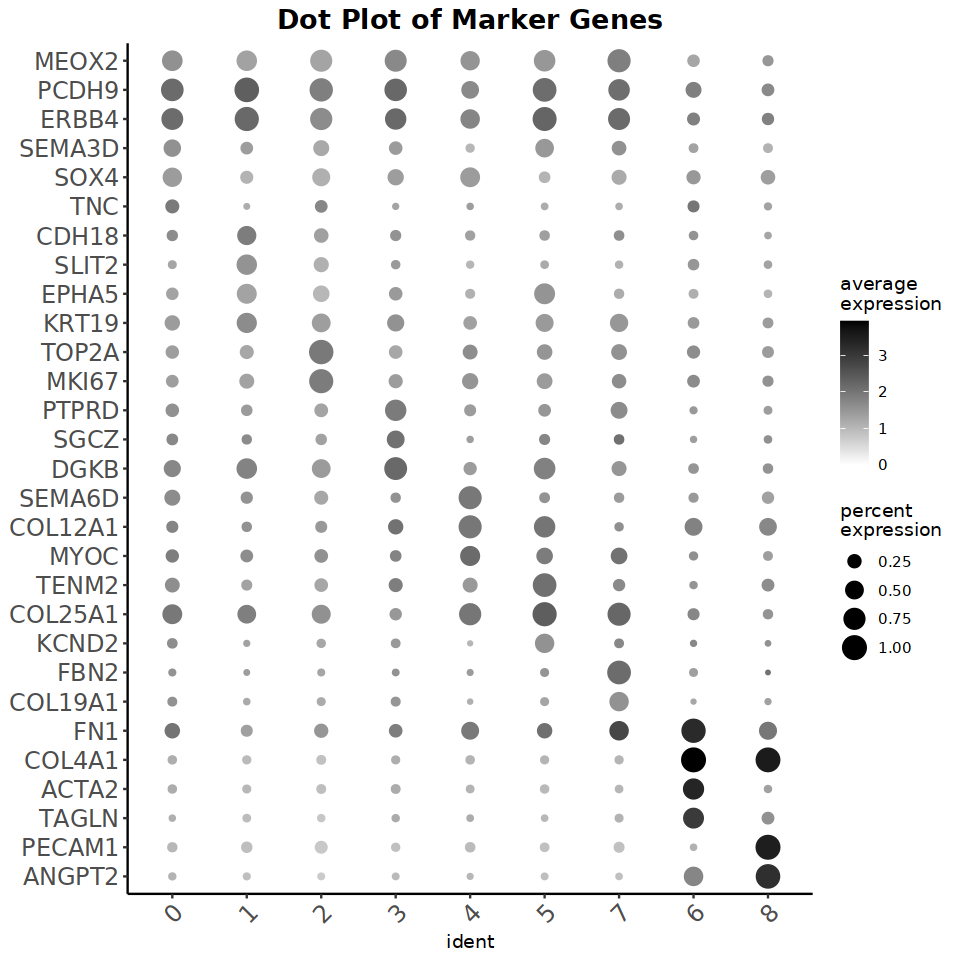

In [9]:
options(repr.plot.width = 8, repr.plot.height = 8, warn=-1,verbose = FALSE)
dittoDotPlot(seurat_obj, vars = rev(c(c("MEOX2","PCDH9","ERBB4"), unlist(markers, use.names=F))),
    group.by = "ident", x.labels.rotate=TRUE, 
    min.color="#ffffffff", max.color="#000000",
    min.percent = 0.00001, max.percent = 1,
    slot="data", scale = FALSE) + 
    ggtitle(glue('Dot Plot of Marker Genes')) + 
    theme(
        plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),)+coord_flip()

## Renaming

In [10]:
rename_clusters= list("0"="Tumor SEMA3D", 
                      "1"="Tumor CDH18",
                      "2"="Tumor Cycling",
                      "3"="Tumor SGCZ",
                      "4"="Tumor SEMA6D",
                      "5"="Tumor TENM2",
                      "6"="Fibroblast",
                      "7"="Tumor FBN2",
                      "8"="Endothelial cells")

seurat_obj <- RenameIdents(object = seurat_obj, rename_clusters)
seurat_obj$l1_annot <- Idents(seurat_obj)

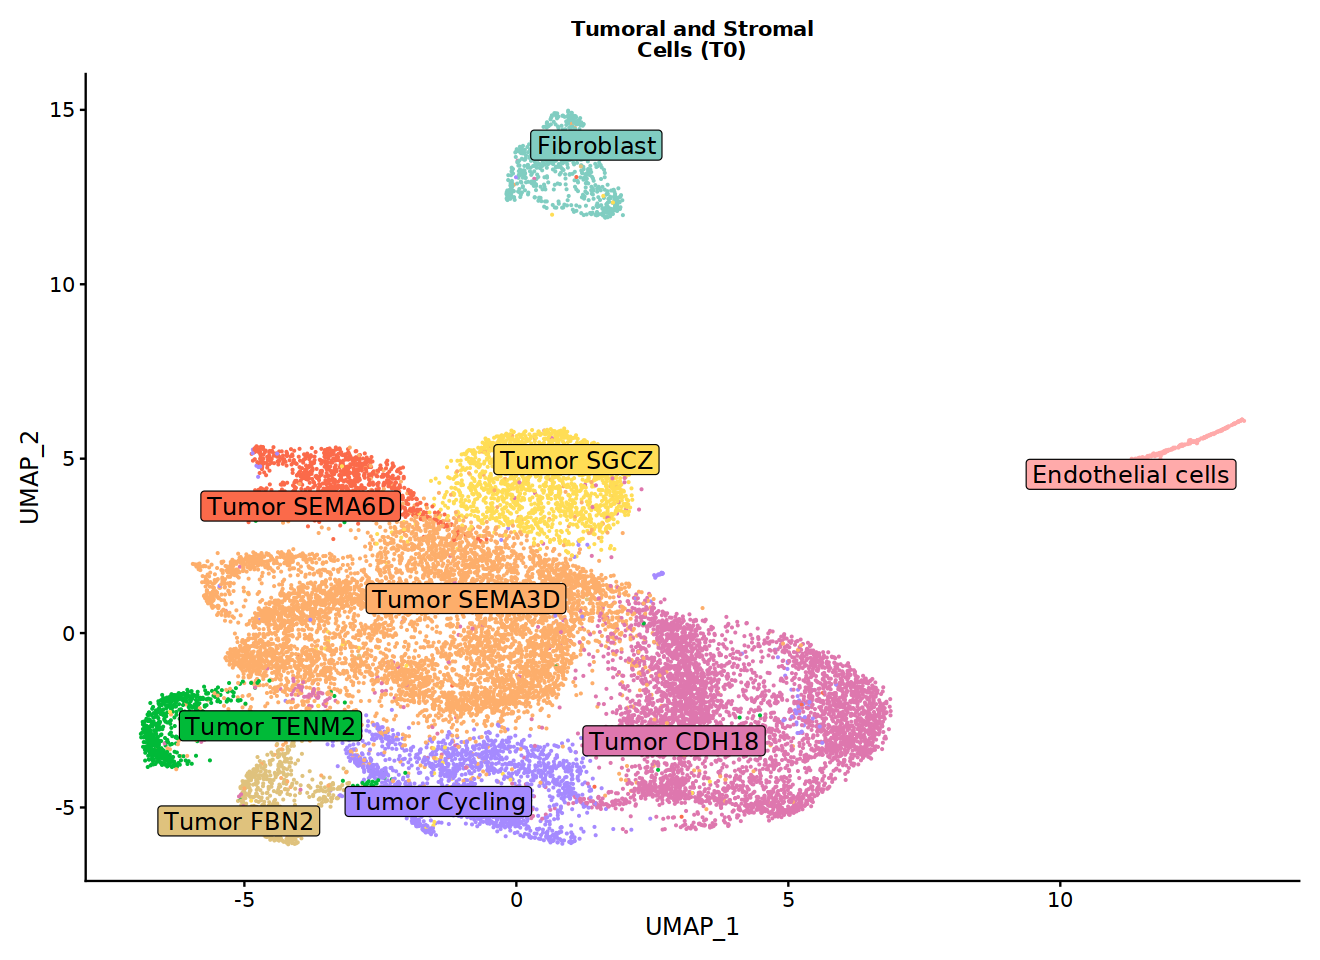

In [11]:
options(repr.plot.width = 11, repr.plot.height = 8, warn=-1,verbose = FALSE)
dpc <- DimPlot(
  seurat_obj,
  reduction = "umap",
  label = T,
  label.box = TRUE,
  label.size = 5,
  repel = TRUE,
  cols = unlist(stromal_pal),
  pt.size = 0.1
) + NoLegend() + ggtitle('Tumoral and Stromal\nCells (T0)') + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold")) 
dpc

In [12]:
seurat_obj$l1_annot <- factor(seurat_obj$l1_annot, levels = rename_clusters[names(markers)])

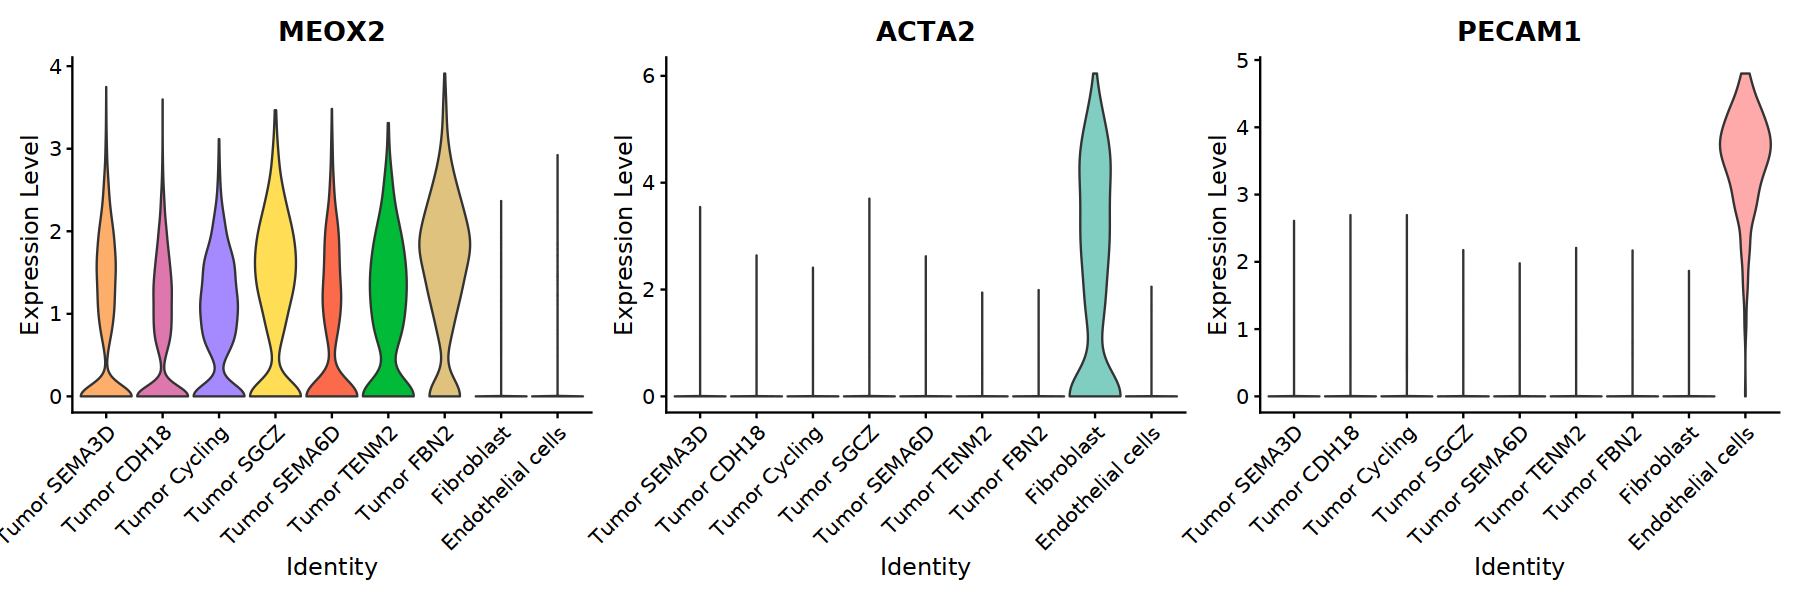

In [13]:
options(repr.plot.width = 15, repr.plot.height =5, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, feature=c("MEOX2", "ACTA2", "PECAM1"), group.by="l1_annot",
           cols=stromal_pal, ncol=3, pt.size=0)

In [14]:
rna.markers <- FindAllMarkers(seurat_obj, min.pct = 0.1, 
                              logfc.threshold = 0.1, only.pos = T,
                              random.seed=0, max.cells.per.ident=1000)

Calculating cluster Tumor SEMA3D

Calculating cluster Tumor CDH18

Calculating cluster Tumor Cycling

Calculating cluster Tumor SGCZ

Calculating cluster Tumor SEMA6D

Calculating cluster Tumor TENM2

Calculating cluster Fibroblast

Calculating cluster Tumor FBN2

Calculating cluster Endothelial cells



In [15]:
rna.markers <- rna.markers %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC))

In [16]:
Idents(seurat_obj) <- factor(x = Idents(seurat_obj), levels = names(markers))

## Save

In [17]:
saveRDS(seurat_obj, here(glue("{annot}/{robj_dir}/4.0-T0_CD45neg_l1.rds")))

In [18]:
write_csv(rna.markers, here(glue("{annot}/{robj_dir}/4.0-T0_CD45neg_l1.csv")))

In [19]:
ggsave(plot = dpc, width = 11, height = 8, dpi = 300, 
       file = here::here(glue::glue("{annot}/{plt_dir}/4.0-umap_T0_CD45neg_l1.png")))

In [20]:
seurat_obj

An object of class Seurat 
30832 features across 18258 samples within 1 assay 
Active assay: RNA (30832 features, 2392 variable features)
 2 dimensional reductions calculated: pca, umap

# Session Info

In [21]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/groups/singlecell/isentis/conda_envs/ines_r4.1.1c/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=es_ES.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=es_ES.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=es_ES.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] dittoSeq_1.6.0     lubridate_1.9.3    forcats_1.0.0      stringr_1.5.0     
 [5] dplyr_1.1.3        purrr_1.0.2        readr_2.1.4        tidyr_1.3.0       
 [9] tibble_3.2.1       tidyverse_2.0.0    ggplot2_3.4.4      glue_1.6.2        
[13] here_1.0.1         SeuratObject_4